In [1]:
!git clone https://www.github.com/rickiepark/deep-learning-with-python-notebooks.git

Cloning into 'deep-learning-with-python-notebooks'...
remote: Enumerating objects: 123888, done.
remote: Total 123888 (delta 0), reused 0 (delta 0), pack-reused 123888
Receiving objects: 100% (123888/123888), 685.24 MiB | 37.68 MiB/s, done.
Resolving deltas: 100% (126/126), done.
Checking out files: 100% (104042/104042), done.


In [0]:
# cat,dog제목에 레이블링이 되어 이씅ㅁ 3개의폴더 (train, validation, test폴더)이 폴더에 각각 cats, dogs폴더 만들어서 이름 확인하고 각 폴더에 들어갈 수 잇게 할거임
import os, shutil # 폴더 관련 라이브러리


In [0]:

original_dataset = './deep-learning-with-python-notebooks/datasets/cats_and_dogs/train' # 원본데이터 위치 알려줌 얘를 다른데 넣어야함

base_dir = './deep-learning-with-python-notebooks/datasets/image'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')    # path경로찾아감 join 경로 이어줌 './datasets/image/train만든것
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)



# cats,dogs폴더
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)


validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)




In [0]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


In [0]:
# 파일네임 확인하게
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
  src = os.path.join(original_dataset, fname)
  destination = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, destination)
  

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
  src = os.path.join(original_dataset, fname)
  destination = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, destination)
  

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
  src = os.path.join(original_dataset, fname)
  destination = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, destination)
  

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
  src = os.path.join(original_dataset, fname)
  destination = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, destination)
  

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
  src = os.path.join(original_dataset, fname)
  destination = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, destination)
  

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
  src = os.path.join(original_dataset, fname)
  destination = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, destination)
  
  

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) # 필터의 갯수가 특성맵의 깊이 32, 64 128필터갯수 점차 늘림//갯수는 늘지만 필터 크기는 점점 줄어듬
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

# 일반신경망
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) # 2중분류므로 시그모이드

Using TensorFlow backend.
W0724 01:34:25.187092 140515755804544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 01:34:25.204693 140515755804544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 01:34:25.210436 140515755804544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 01:34:25.225197 140515755804544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
model.summary() # 구조는 일단 만듬

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

W0724 01:34:31.140090 140515755804544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 01:34:31.169712 140515755804544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0724 01:34:31.175829 140515755804544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) # 단위를 정해준것/
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   target_size = (150, 150), 
                                                   batch_size = 20, 
                                                   class_mode = 'binary') # 150, 150사이즈로 이미지 크기 전처리, train dir에있는
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                   target_size = (150, 150), 
                                                   batch_size = 20, 
                                                   class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# 학습시작 keras 책 191p
history = model.fit_generator(train_generator, 
                   
                              validation_data = validation_generator,
                             epochs = 30,
                             steps_per_epoch = 100,
                             validation_steps = 50) # 그냥 fit x// 제너레이터로 연동해서 쓰게되면fit_generater // 

Epoch 1/30
100/100 [==============================] - 9s 95ms/step - loss: 0.6955 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.4960
Epoch 2/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6898 - acc: 0.5385 - val_loss: 0.6543 - val_acc: 0.6050
Epoch 3/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6500 - acc: 0.6150 - val_loss: 0.6273 - val_acc: 0.6380
Epoch 4/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6263 - acc: 0.6510 - val_loss: 0.6361 - val_acc: 0.6550
Epoch 5/30
100/100 [==============================] - 9s 87ms/step - loss: 0.5733 - acc: 0.7030 - val_loss: 0.5894 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5079 - acc: 0.7555 - val_loss: 0.5374 - val_acc: 0.7240
Epoch 7/30
100/100 [==============================] - 9s 87ms/step - loss: 0.4609 - acc: 0.7780 - val_loss: 0.5864 - val_acc: 0.7280
Epoch 8/30
100/100 [==============================] - 9s 85ms/step - 

In [0]:
model.save('cats_and_dogs.h5')

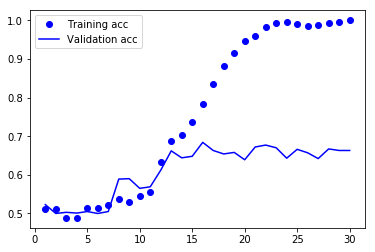

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.legend()

plt.show()

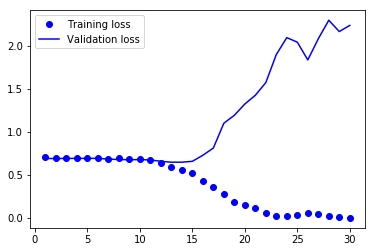

In [0]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.legend()

plt.show() # 이미지는 과대적합을 막기위해 데이터증식 할수있음, 이미지를 변형하여 가짜 데이터를 막듬

In [0]:
# 과대적합 -> 드롭아웃과 이미지증식사용

datagen = ImageDataGenerator(rotation_range = 20, 
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            fill_mode = 'nearest',
                            zoom_range = 0.1, 
                            horizontal_flip = True)

In [0]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) 
                 for fname in os.listdir(train_cats_dir)])



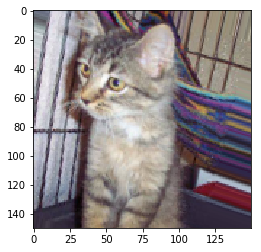

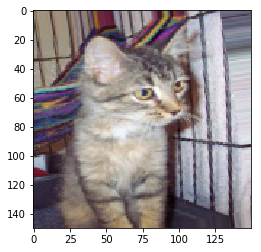

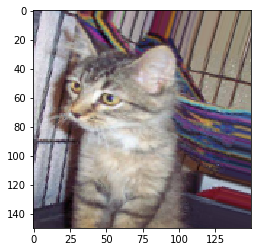

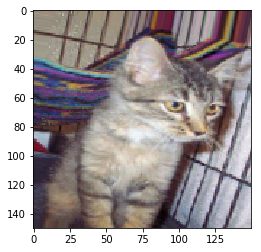

In [0]:
img_path = fnames[112]
img = image.load_img(img_path, target_size = (150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape) # 튜플에 다른 튜플을 연결한 것

i = 0

for batch in datagen.flow(x, batch_size = 1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) # 필터의 갯수가 특성맵의 깊이 32, 64 128필터갯수 점차 늘림//갯수는 늘지만 필터 크기는 점점 줄어듬
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))



model.add(layers.Flatten())
# 일반신경망
# dropout
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) # 2중분류므로 시그모이드

W0723 09:14:30.163785 140146676377472 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# optimizer
from keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'], )

In [0]:
train_datagen = ImageDataGenerator(rotation_range = 40, 
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            fill_mode = 'nearest',
                            zoom_range = 0.2,
                                  rescale = 1./255)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255) # test데이터엔 이미지증식x 트레인데이터에만 함

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   target_size = (150, 150), 
                                                   batch_size = 20, 
                                                   class_mode = 'binary') # 150, 150사이즈로 이미지 크기 전처리, train dir에있는
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                   target_size = (150, 150), 
                                                   batch_size = 20, 
                                                   class_mode = 'binary')

history = model.fit_generator(train_generator, 
                             validation_data = validation_generator,
                             epochs = 100,
                             steps_per_epoch = 100,
                             validation_steps = 50) # 그냥 fit x// 제너레이터로 연동해서 쓰게되면fit_generater // 이미지증식하면 에포크 70넘어야함

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6917 - acc: 0.5405 - val_loss: 0.6888 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 20s 196ms/step - loss: 0.6906 - acc: 0.5110 - val_loss: 0.6853 - val_acc: 0.5550
Epoch 3/100
100/100 [==============================] - 19s 195ms/step - loss: 0.6858 - acc: 0.5570 - val_loss: 0.6630 - val_acc: 0.6030
Epoch 4/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6792 - acc: 0.5815 - val_loss: 0.6611 - val_acc: 0.5930
Epoch 5/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6814 - acc: 0.5835 - val_loss: 0.6547 - val_acc: 0.6330
Epoch 6/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6845 - acc: 0.5595 - val_loss: 0.6804 - val_acc: 0.5490
Epoch 7/100
100/100 [==============================] - 20s 197ms/step - loss: 0.6722 - acc: 0.5940 -